# 📝 Exercise M7.01 | Comparar modelo con baseline

Alvaro Lucio-Villegas de Cea


In this exercise we will define dummy classification baselines and use them
as reference to assess the relative predictive performance of a given model
of interest.

We illustrate those baselines with the help of the Adult Census dataset,
using only the numerical features for the sake of simplicity.

In [27]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [28]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [29]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), LogisticRegression())

Compute the cross-validation (test) scores for the classifier on this
dataset. Store the results pandas Series as we did in the previous notebook.

In [30]:
# Write your code here.
from sklearn.model_selection import cross_validate

cv_results_logistic_regression = cross_validate(classifier, data, target, cv=cv, n_jobs=2)

test_score_logistic_regression = pd.Series(cv_results_logistic_regression["test_score"], name="Logistic Regression")
test_score_logistic_regression

0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814709
6    0.813112
7    0.810327
8    0.812416
9    0.816388
Name: Logistic Regression, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that
constantly predicts the most frequent class observed the training set. Please
refer to the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [31]:
# Write your code here.
from sklearn.dummy import DummyClassifier

most_frequent_classifier = DummyClassifier(strategy="most_frequent")
cv_results_most_frequent = cross_validate(most_frequent_classifier, data, target, cv=cv, n_jobs=2)
test_score_most_frequent = pd.Series(cv_results_most_frequent["test_score"], name="Most frequent class predictor") 

test_score_most_frequent

0    0.760329
1    0.756808
2    0.759142
3    0.760739
4    0.761681
5    0.761885
6    0.757463
7    0.757176
8    0.761885
9    0.763114
Name: Most frequent class predictor, dtype: float64

Now that we collected the results from the baseline and the model,
concatenate the test scores as columns a single pandas dataframe.

In [32]:
# Write your code here.
all_test_scores = pd.concat([test_score_logistic_regression, test_score_most_frequent],axis='columns')

all_test_scores

,Logistic Regression,Most frequent class predictor
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814709,0.761885
6,0.813112,0.757463
7,0.810327,0.757176
8,0.812416,0.761885
9,0.816388,0.763114



Next, plot the histogram of the cross-validation test scores for both
models with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

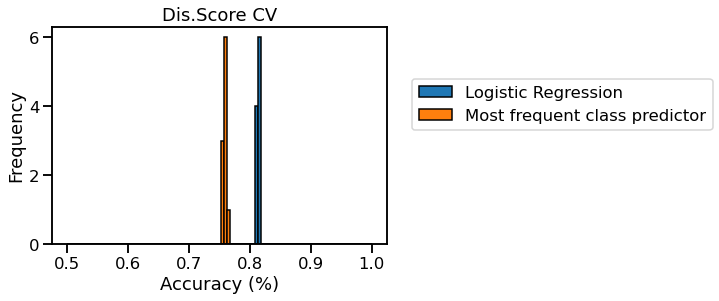

In [33]:
# Write your code here.
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(start=0.5, stop=1.0, num=100)
all_test_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Dis.Score CV")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [34]:

#Stratified

stratified_dummy = DummyClassifier(strategy="stratified")

cv_results_stratified = cross_validate(stratified_dummy, data, target, cv=cv, n_jobs=4)

test_score_dummy_stratified = pd.Series(cv_results_stratified["test_score"], name="Stratified class predictor")

In [35]:
#Uniform
uniform_dummy = DummyClassifier(strategy="uniform")

cv_results_uniform = cross_validate(uniform_dummy, data, target, cv=cv, n_jobs=4)

test_score_dummy_uniform = pd.Series(cv_results_uniform["test_score"], name="Uniform class predictor")

In [36]:
all_test_scores = pd.concat(
    [
        test_score_logistic_regression,
        test_score_most_frequent,
        test_score_dummy_stratified,
        test_score_dummy_uniform,
    ],axis='columns'
)

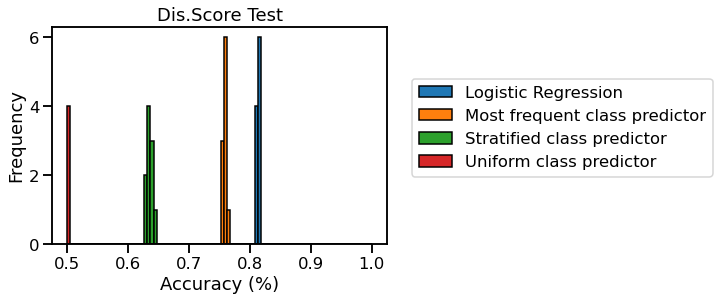

In [37]:
all_test_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Dis.Score Test")